<a href="https://colab.research.google.com/github/fralfaro/MAT281_20XX/blob/main/docs/lectures/data_manipulation/vi_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Matplotlib

## Visualización Imperativa

Este paradigma se focaliza en las instrucciones recibidas, ya que no abstrae las operaciones o codificaciones visuales. Algunas de sus características son:

* Se especifica _Cómo_ se debe hacer algo.
* Se deben especificar manualmente los pasos del trazado.
* Especificación y ejecución entrelazadas.

Coloquialmente se puede entender como que se debe decidir pixel a pixel lo que se desea mostrar.


## Acerca de Matplotlib 


<img src="https://drive.google.com/uc?export=view&id=1OXiJyryk4W0dLKHT9Ye3Z6gp1_5oFGPi" width = "200" align="center"/>

**Matplotlib** es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy. Proporciona una API, pylab, diseñada para recordar a la de **MATLAB**.

En matplotlib todo está organizado en una jerarquía:

* En la parte superior se encuentra el módulo `matplotlib.pyplot`. En este nivel, se utilizan funciones simples para agregar elementos de trazado (líneas, imágenes, texto, etc.) a los ejes actuales en la figura actual. 


* El siguiente nivel en la jerarquía es el primer nivel de la interfaz orientada a objetos, en la que pyplot se usa solo para algunas funciones, como la creación de figuras, y el usuario crea y realiza un seguimiento explícito de los objetos de figuras y ejes. En este nivel, el usuario usa pyplot para crear figuras, y a través de esas figuras, se pueden crear uno o más objetos de ejes.

### Componentes de un gráfico


<img src="https://drive.google.com/uc?export=view&id=1MxuMmQpd2Q1oIVx0xYLkurv9rKeW0zj3" width = "550" align="center"/>

#### Figure

Es la visualización completa. _Figure_ realiza un seguimiento de todos los _Axes_ hijos y el _Canvas_. Una figura puede tener cualquier número de _Axes_, pero para ser útil debe tener al menos uno.

La forma más fácil de crear una nueva _Figure_ es con pyplot:

```python
fig = plt.figure()  # an empty figure with no axes

fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
```

#### Axes

Esto es lo que se puede pensar como 'un gráfico', es la región de la imagen con el espacio de datos. Un _Figure_ dada puede contener muchos _Axes_, pero un objeto _Axe_ dado solo puede estar en un _Figure_. _Axes_ contiene dos (o tres en el caso de 3D) objetos _Axis_ que se ocupan de los límites de datos. Cada _Axe_ tiene un título, una etiqueta para el eje horizonal y una etiqueta para el eje vertical.

La clase _Axes_ y sus funciones son el punto de entrada principal para trabajar con la interfaz orientada a objetos.

#### Axis

Corresponden a los ejes, algo así como líneas rectas. Se encargan de establecer los límites del gráfico y generar los ticks (las marcas en el eje) y los ticklabels (_strings_ que etiquetan los ticks).

## Gráfico a Gráfico
<a id='plot-plot'></a>

A continuación, mostraremos un amplia gama de gráficos que pueden ser desplegados con `Matplotlib`. Lo primero será cargar las librerias para este módulo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.stats import multivariate_normal

%matplotlib inline

### Gráfico de líneas

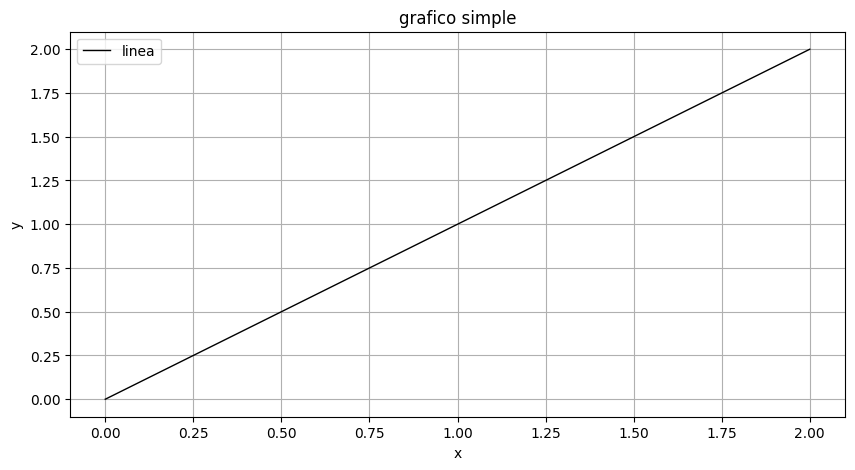

In [2]:
# grafico simple

# datos
x = np.linspace(0, 2, 100)

# grafico

# tamano del grafico
fig = plt.figure(figsize=(10, 5)) 

# graficar
plt.plot(
    x, # eje x
    x, # eje y
    label='linea', # etiquetado
    color="black", # color
    linewidth=1 # tamano de la curva
)
plt.legend() # agregar etiquetado
plt.title("grafico simple") # agregar titulo
plt.xlabel('x') # nombre eje x
plt.ylabel('y') # nombre eje y
plt.grid() # agregar grillado
plt.show() # mostrar grafico

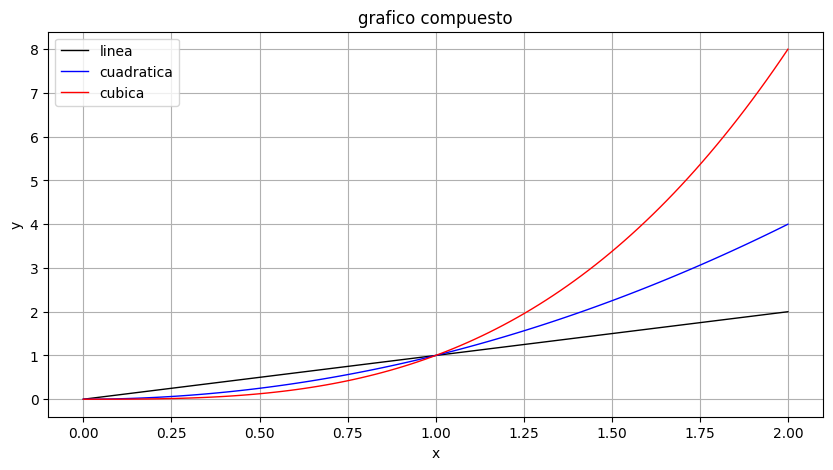

In [3]:
# grafico compuesto

# datos
x = np.linspace(0, 2, 100)

# grafico
# tamano del grafico
fig = plt.figure(figsize=(10, 5)) 

# graficar

# a) lineal
plt.plot(
    x, # eje x
    x, # eje y
    label='linea', # etiquetado
    color="black", # color
    linewidth=1 # tamano de la curva
)
# b) cuadratica
plt.plot(
    x, # eje x
    x**2, # eje y
    label='cuadratica', # etiquetado
    color="b", # color
    linewidth=1 # tamano de la curva
)
# c) cubica 
plt.plot(
    x, # eje x
    x**3, # eje y
    label='cubica', # etiquetado
    color="r", # color
    linewidth=1 # tamano de la curva
)

plt.legend() # agregar etiquetado
plt.title("grafico compuesto") # agregar titulo
plt.xlabel('x') # nombre eje x
plt.ylabel('y') # nombre eje y
plt.grid() # agregar grillado
plt.show() # mostrar grafico

**¿Cuándo utilizar gráfico de líneas?**
* x: Debe ser datos del tipo ordinal o cuantitativo.
* y: Debe ser datos de tipo ordinal, posicional o cuantitativo.

### Gráfico de Barras
<a id='barplot'></a>

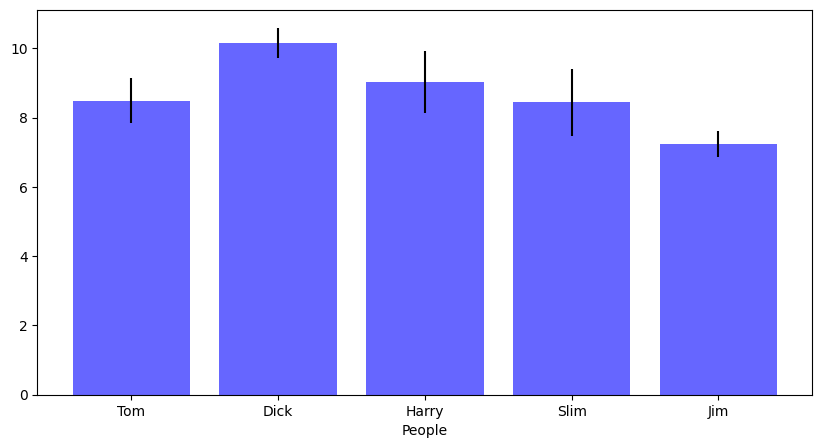

In [4]:
# datos
np.random.seed(0) # fijar semilla
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

# grafico
fig = plt.figure(figsize=(10, 5))
plt.bar(
    y_pos, # eje x
    performance, # eje y 
    yerr=error,  # # error mostrado en eje y
    align='center', # centrar nombre eje x
    color="blue", # color 
    alpha=0.6 # intensidad del color
)
plt.xticks(y_pos, people)
plt.xlabel('People')
plt.show()

Ahora para realizar el mismo gráfico pero con los ejes invertidos, se debe graficar con `plt.barh`

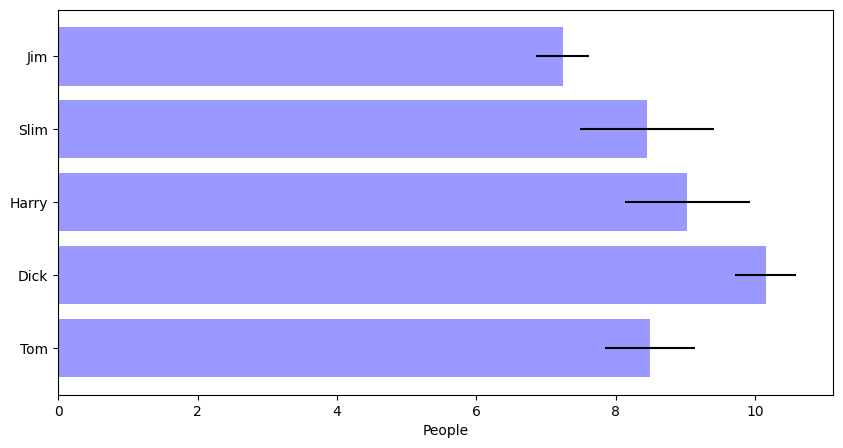

In [5]:
# datos
np.random.seed(0) # fijar semilla
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

# grafico
fig = plt.figure(figsize=(10, 5))
plt.barh(
    y_pos, # eje x
    performance, # eje y 
    xerr=error,  # error mostrado en eje x
    align='center', # centrar nombre eje y
    color="blue", # color 
    alpha=0.4 # intensidad del color
)
plt.yticks(y_pos, people)
plt.xlabel('People')
plt.show()

Ahora, si queremos poner ambos gráficos en una sola vista, debemos ejecutar la siguiente rutina:

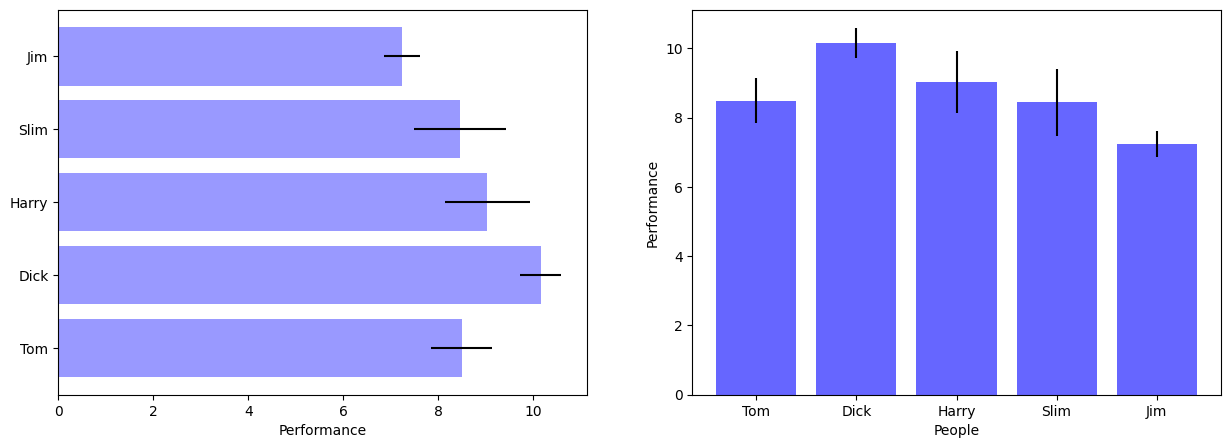

In [6]:
# datos
np.random.seed(0) # fijar semilla
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

# grafico
fig = plt.figure(figsize=(15, 5)) # ventana

# grafico lado izquierdo
plt.subplot(1, 2, 1) # sub-ventana
plt.barh(y_pos, performance, xerr=error, align='center', color="blue", alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')

# grafico lado derecho
plt.subplot(1, 2, 2) # sub-ventana
plt.bar(y_pos, performance, yerr=error, align='center', color="blue", alpha=0.6)
plt.xticks(y_pos, people)
plt.xlabel('People')
plt.ylabel('Performance')

plt.show()

**¿Cuándo utilizar gráfico de barras?**
* x: Debe ser datos del tipo nominal o ordinal.
* y: Debe ser datos de tipo ordinal, posicional o cuantitativo.

Evitar: gráfico de nominal vs nominal.

### Scatter Plot
<a id='scatter-plot'></a>

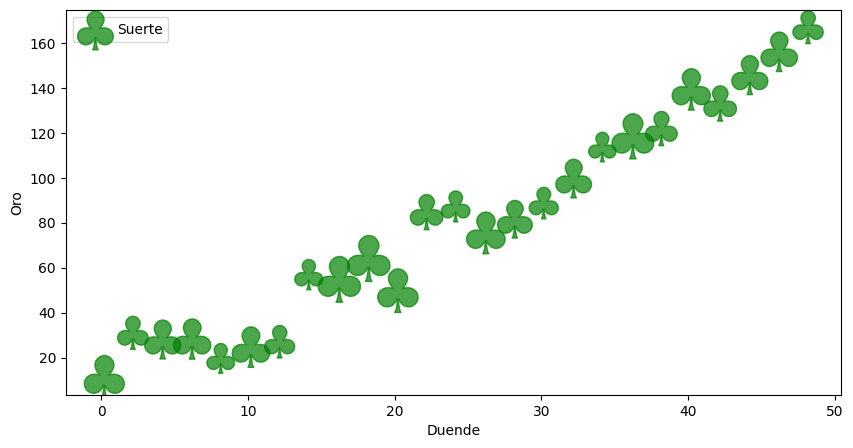

In [7]:
# datos
np.random.seed(42)
x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

# grafico
fig = plt.figure(figsize=(10, 5)) # ventana
plt.scatter(
    x, # eje x
    y, # eje y
    s, # tamano de los puntos
    c="g", # color
    alpha=0.7, # intensidad color
    marker=r'$\clubsuit$', # forma de los puntos
    label="Suerte" # etiquetdo fijando posicion
)
plt.xlabel("Duende")
plt.ylabel("Oro")
plt.legend(loc='upper left')
plt.show()

**Ejercicio**: Realizar un gráfico que cumpla las siguientes restricciones:

* Valores de los ejes: $x,y \in [0,1]$
* Gráfico de línea de una circunferencia de radio $r_0$
* Los puntos que se encuentren dentro de la circunferencia tengan forma de círculos con color naranja y aquellos utnos que se encuentren fuera tengan forma de triángulos con color azul.
* Los puntos graficados deben estar escalado por tamaño.

In [8]:
# datos
N = 100
r0 = 0.6 # radio inicial
x = 0.9 * np.random.rand(N) # puntos aleatorios eje x
y = 0.9 * np.random.rand(N) # puntos aleatorios eje y

r = np.sqrt(x ** 2 + y ** 2) # radio sacado de los puntos

area = np.pi * (10 * np.random.rand(N)) ** 2  # tamano
area1 = np.ma.masked_where(r < r0, area) # dentro del radio objetivo
area2 = np.ma.masked_where(r >= r0, area) # fuera del radio objetivo

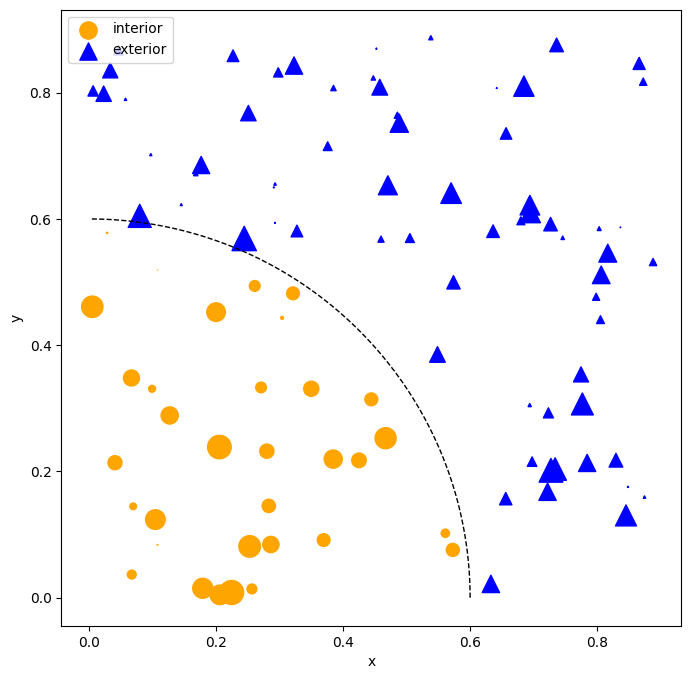

In [9]:
# grafico

# a) circunferencia
plt.figure(figsize=(8, 8))
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta), "k--", lw=1.0)

# b) figuras dentro de la circuenferencia
sc1 = plt.scatter(x, y, s=area2, marker='o', c = "orange", label="interior" )

# b) figuras fuera de la circuenferencia
sc2 = plt.scatter(x, y, s=area1, marker='^', c = "b", label="exterior")


plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper left')
plt.show()

**¿Cuándo utilizar scatter plot?**
* x: Dato del tipo posicional o cuantitativo.
* y: Dato del tipo posicional o cuantitativo. 
* z: Dato del tipo nominal u ordinal (opcional) 

***OBSERVACION***: Si hay pocos puntos, también puede usarse para z datos de tipo posicional o cuantitativo.


### Mapa de calor

In [10]:
# datos
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

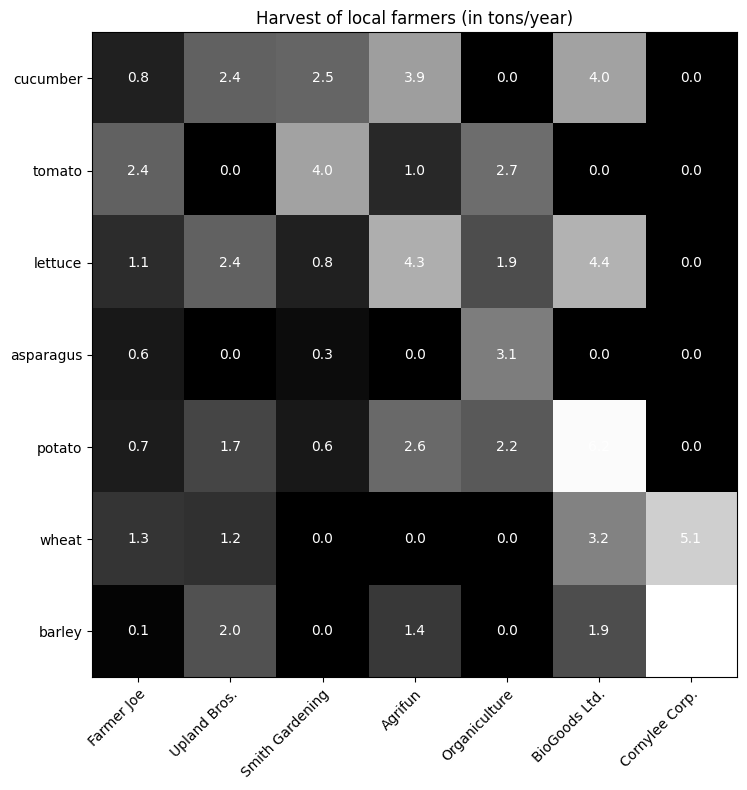

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

im = ax.imshow(harvest,cmap='gray')


# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

### Otros gráficos de interés

#### Gráfico de Barra de Error
<a id='error-bar-plot'></a>

C:\Users\franc\AppData\Local\Temp\ipykernel_14816\2000223557.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


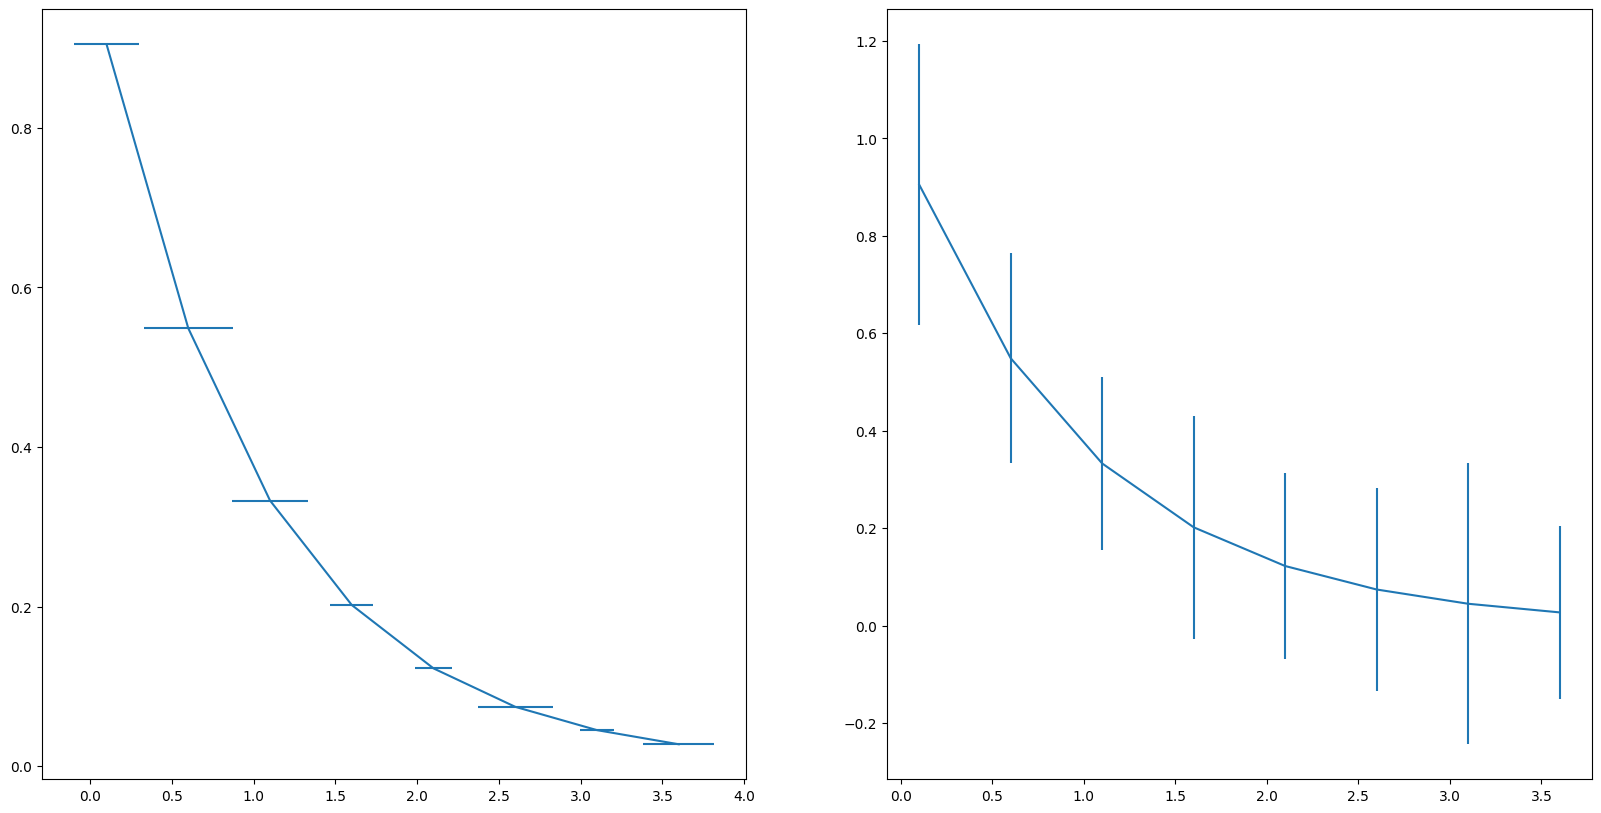

In [12]:
# datos
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# graficos
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
x_error = 0.1 + 0.2*np.random.rand(len(x))
ax1.errorbar(x, y, xerr=x_error)
y_error = 0.1 + 0.2*np.random.rand(len(x))
ax2.errorbar(x, y, yerr=y_error)
fig.show()

**¿Cuándo utilizar gráfico de barra de error?**
* x: Dato del tipo posicional o cuantitativo.
* y: Dato del tipo posicional o cuantitativo. 
* z: Dato del tipo posicional o cuantitativo.
Los valores de z tienen que tener las mismas unidades y.

#### Countor Plot
<a id='countour-plot'></a>

C:\Users\franc\AppData\Local\Temp\ipykernel_14816\108196608.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


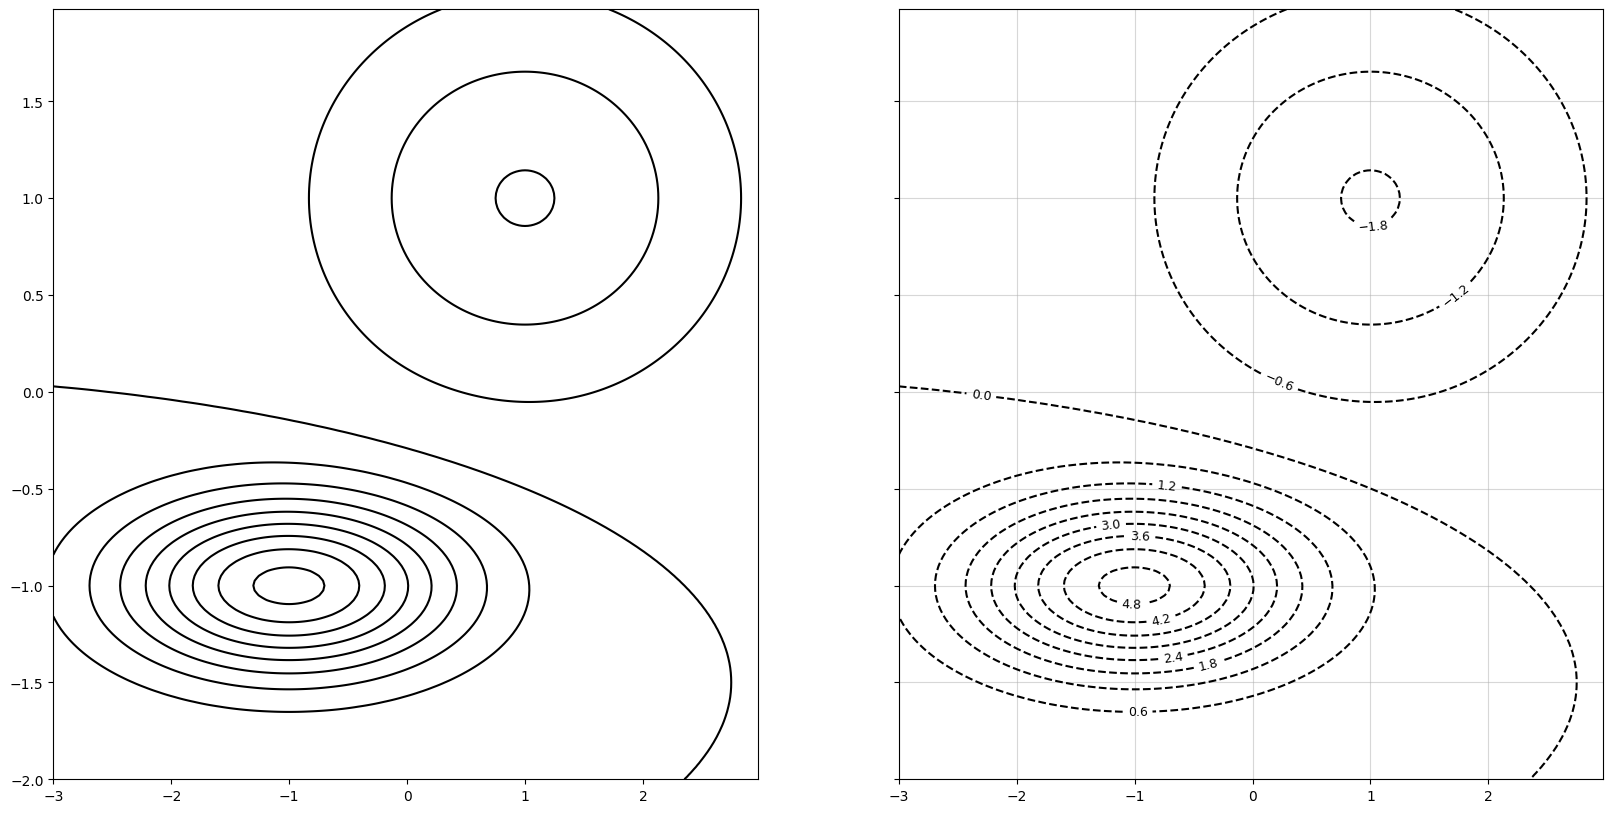

In [13]:
# datos
x, y = np.mgrid[-3:3:.025, -2:2:.025]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
z1 = multivariate_normal.pdf(
    pos,
    mean=[-1.0, -1.0],
    cov=[[1.0, 0.0], [0.0, 0.1]]
)
z2 = multivariate_normal.pdf(
    pos, 
    mean=[1.0, 1.0],
    cov=[[1.5, 0.0], [0.0, 0.5]]
)
z = 10 * (z1 - z2)

# grafico
fig, axs = plt.subplots(ncols=2, figsize=(20, 10), sharex=True, sharey=True)
cmaps = [cm.rainbow, cm.autumn, cm.coolwarm, cm.gray]
countour_styles = [
    {"colors": "k", "linestyles": "solid"},
    {"colors": "k", "linestyles": "dashed"},
]

for i, ax in zip(range(len(cmaps)), axs.ravel()):
    cs = ax.contour(x, y, z, 11, **countour_styles[i])
    if i > 0:
        ax.clabel(cs, fontsize=9, inline=1)
        ax.grid(alpha=0.5)
fig.show()

**¿Cuándo se debe utiliar countour plot?**

* x: Dato del tipo posicional o cuantitativo.
* y: Dato de tipo posicional o cuantitativo. 
* z: Dato de tipo posicional o cuantitativo.

***OBSERVACION***: Se debe tener suficiente densidad/regularidad de puntos como para poder obtener superficies de nivel.

#### Campos de Vectores
<a id='vector-field'></a>

¿Porqué se llama quiver al campo de vectores en inglés? 

C:\Users\franc\AppData\Local\Temp\ipykernel_14816\1378192203.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


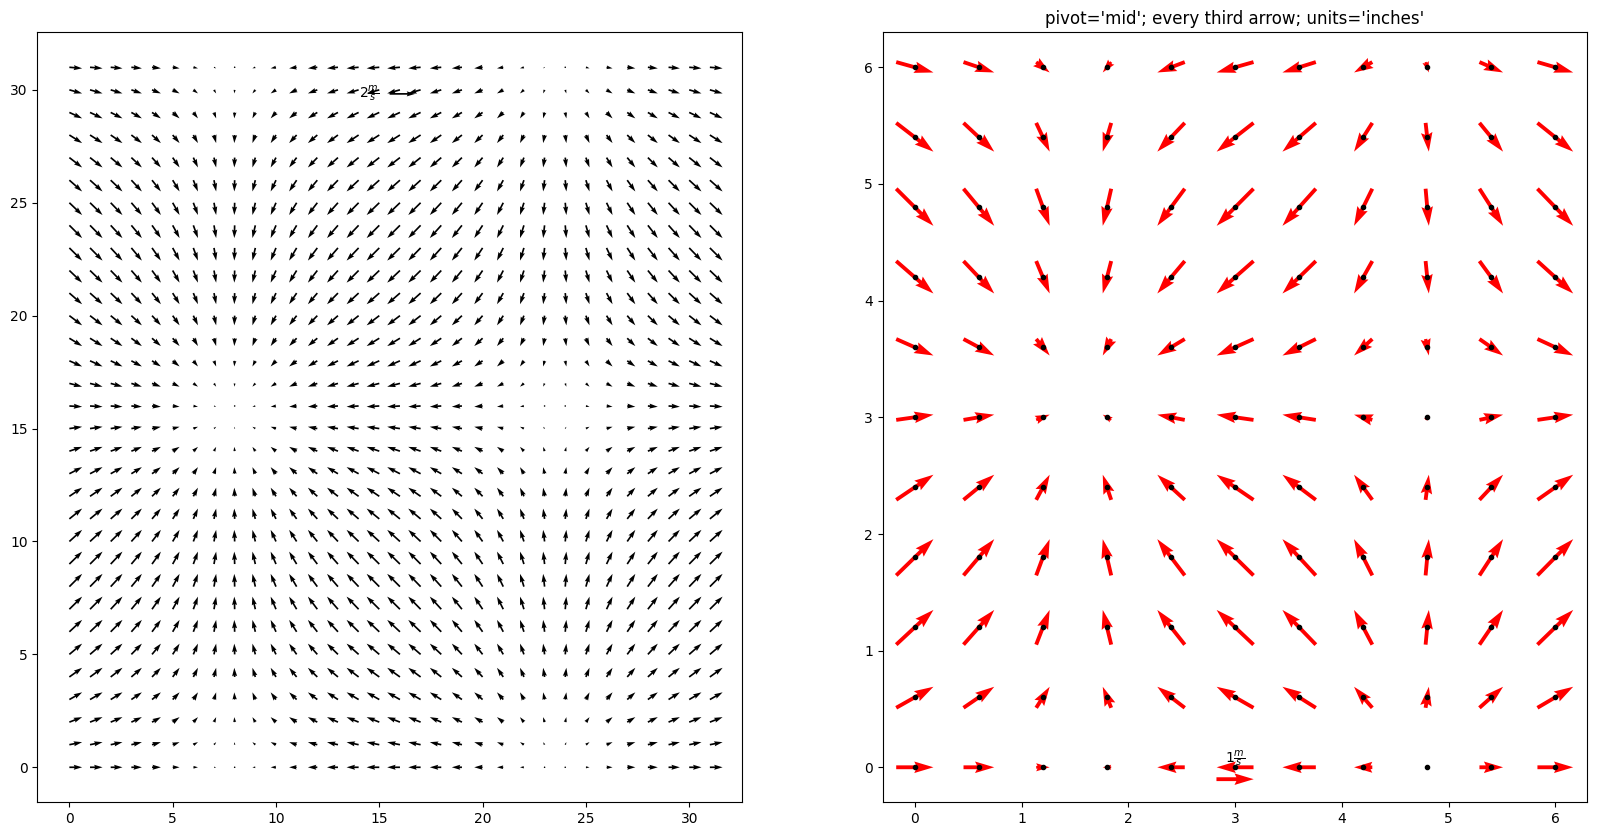

In [14]:
def my_vector_field():
    """
    You can even define a new function.
    """
    X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
    U = np.cos(X)
    V = np.sin(Y)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

    Q1 = ax1.quiver(U, V)
    qk1 = ax1.quiverkey(
        Q1,
        0.5,
        0.92,
        2,
        r'$2 \frac{m}{s}$',
        labelpos='W',
        fontproperties={'weight': 'bold'}
    )
    
    Q2 = ax2.quiver(
        X[::3, ::3],
        Y[::3, ::3],
        U[::3, ::3],
        V[::3, ::3],
        pivot='mid',
        color='r',
        units='inches'
    )
    qk2 = ax2.quiverkey(
        Q2,
        0.5,
        0.03,
        1,
        r'$1 \frac{m}{s}$',
        fontproperties={'weight': 'bold'}
    )
    ax2.plot(X[::3, ::3], Y[::3, ::3], 'k.')
    ax2.set_title("pivot='mid'; every third arrow; units='inches'")
    
    fig.show()

my_vector_field()

**¿Cuándo utilizar campos de vectores?**

* x: Debe ser datos del tipo posicional o cuantitativo.
* y: Debe ser datos de tipo posicional o cuantitativo. 
* z: Pendiente debe ser dato de tipo posicional o cuantitativo.

Evitar: gráfico de campo de vectores si no es posible la interpretación correspondiente.

## Referencias

1. [Gallery-matplotlib](https://matplotlib.org/3.1.1/gallery/index.html)
